In [1]:
import uuid
import os
import asyncio
from pprint import pp
from dotenv import load_dotenv
from tempfile import mkdtemp

from jobs import Worker
from output_data import run_sbml_amici, run_sbml_copasi, run_sbml_tellurium
from shared import MongoDbConnector, save_uploaded_file, upload_blob

load_dotenv('../assets/.env_dev')

MONGO_URI = os.getenv('MONGO_URI')
GOOGLE_APPLICATION_CREDENTIALS = os.getenv('GOOGLE_APPLICATION_CREDENTIALS')
BUCKET_NAME = os.getenv('BUCKET_NAME')
DB_NAME = os.getenv('DB_NAME')

db_connector = MongoDbConnector(connection_uri=MONGO_URI, database_id=DB_NAME, connector_id="test_worker")

In [2]:
sbml_fp = "../model-examples/sbml-core/Elowitz-Nature-2000-Repressilator/BIOMD0000000012_url.xml"

os.path.exists(sbml_fp)

True

In [3]:
from main import db_connector
from jobs import Worker

jobs = db_connector.pending_jobs()

In [4]:
jobs

[{'_id': ObjectId('66aa3842d1e5f99d9dd7b8c5'),
  'status': 'PENDING',
  'job_id': 'localomex0_2d35f3a6-9310-4bf3-8635-2f9cafd1b2cf',
  'path': 'uploads/localomex0_2d35f3a6-9310-4bf3-8635-2f9cafd1b2cf/Elowitz-Nature-2000-Repressilator.omex',
  'simulators': ['amici', 'copasi', 'tellurium'],
  'comparison_id': 'localomex0',
  'timestamp': '2024-07-31 13:12:33.189310',
  'ground_truth_report_path': 'uploads/localomex0_2d35f3a6-9310-4bf3-8635-2f9cafd1b2cf/reports.h5',
  'include_outputs': True,
  'rTol': None,
  'aTol': None,
  'selection_list': ['cI mRNA']},
 {'_id': ObjectId('66aa385dd1e5f99d9dd7b8c6'),
  'status': 'PENDING',
  'job_id': 'localsbml0_2b484464-691d-48b1-8184-05abe9207d7c',
  'path': 'uploads/localsbml0_2b484464-691d-48b1-8184-05abe9207d7c/BIOMD0000000012_url.xml',
  'simulators': ['copasi', 'tellurium'],
  'comparison_id': 'localsbml0',
  'timestamp': '2024-07-31 13:13:00.724845',
  'duration': 10,
  'n_steps': 100,
  'include_outputs': True,
  'rTol': None,
  'aTol': None

In [5]:
job1 = jobs.pop(0)

In [6]:
job1

{'_id': ObjectId('66aa3842d1e5f99d9dd7b8c5'),
 'status': 'PENDING',
 'job_id': 'localomex0_2d35f3a6-9310-4bf3-8635-2f9cafd1b2cf',
 'path': 'uploads/localomex0_2d35f3a6-9310-4bf3-8635-2f9cafd1b2cf/Elowitz-Nature-2000-Repressilator.omex',
 'simulators': ['amici', 'copasi', 'tellurium'],
 'comparison_id': 'localomex0',
 'timestamp': '2024-07-31 13:12:33.189310',
 'ground_truth_report_path': 'uploads/localomex0_2d35f3a6-9310-4bf3-8635-2f9cafd1b2cf/reports.h5',
 'include_outputs': True,
 'rTol': None,
 'aTol': None,
 'selection_list': ['cI mRNA']}

Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `BIOMD0000000012_url.xml` has warnings.
      - 21 warnings of type SBML unit consistency (99505). The following is 

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does 

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does 

 succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `BIOMD0000000012_url.xml` has warnings.
      - 21 warnings of type SBML unit consistency (99505). The following is 

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does 

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does 

 succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `BIOMD0000000012_url.xml` has warnings.
      - 21 warnings of type SBML unit consistency (99505). The following is 

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does 

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
   

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does 

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does 

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does 

 succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `BIOMD0000000012_url.xml` has warnings.
      - 21 warnings of type SBML unit consistency (99505). The following is 

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does 

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
   

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does 

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does 

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...


/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-check-lb7k8x6F-py3.9/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does 

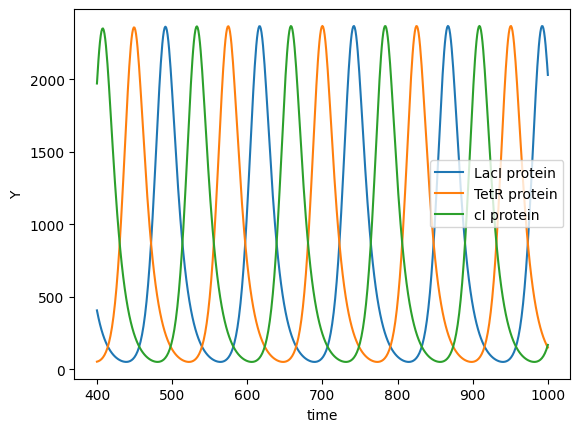

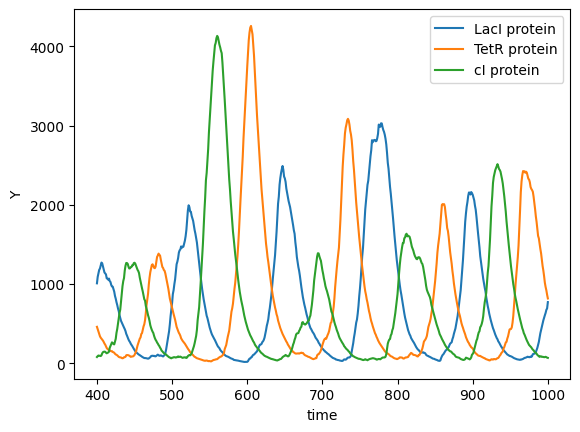

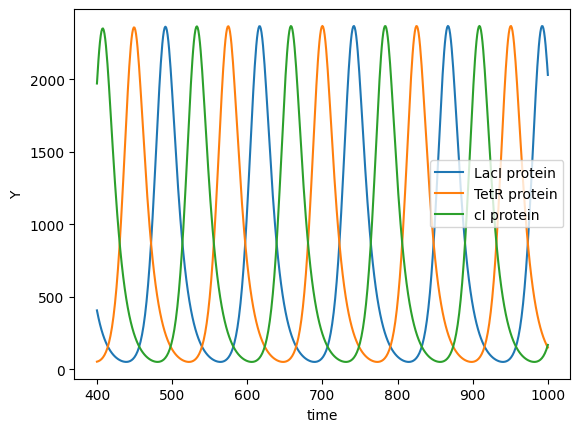

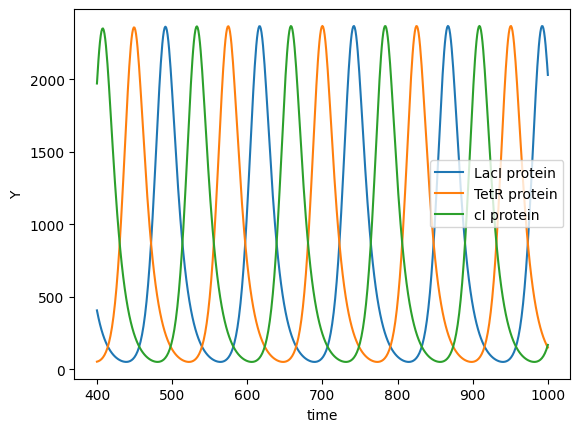

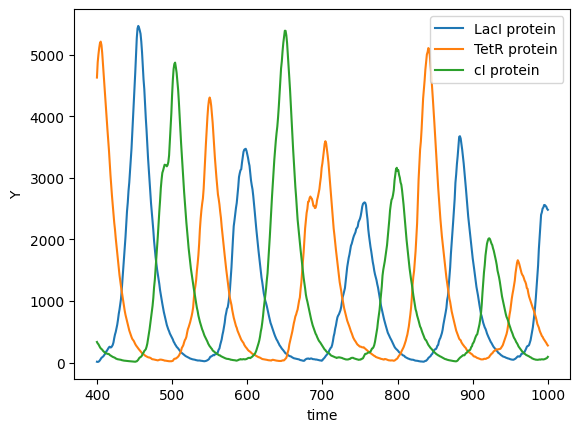

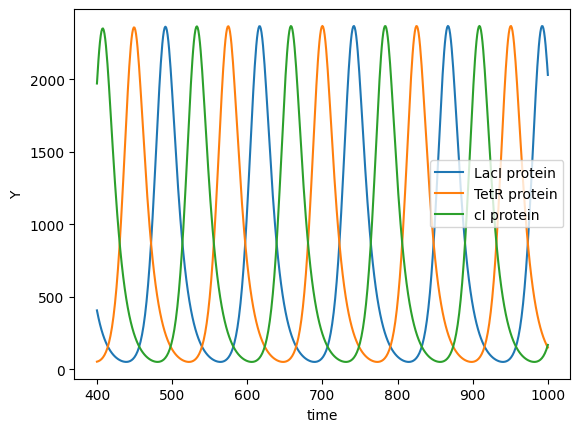

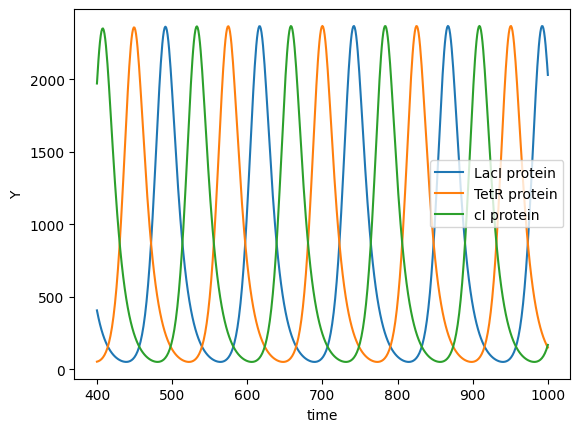

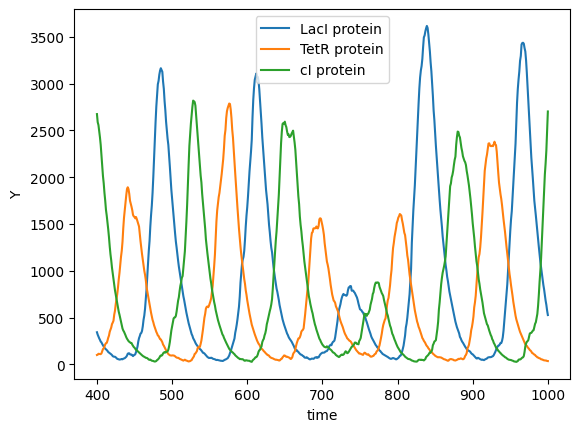

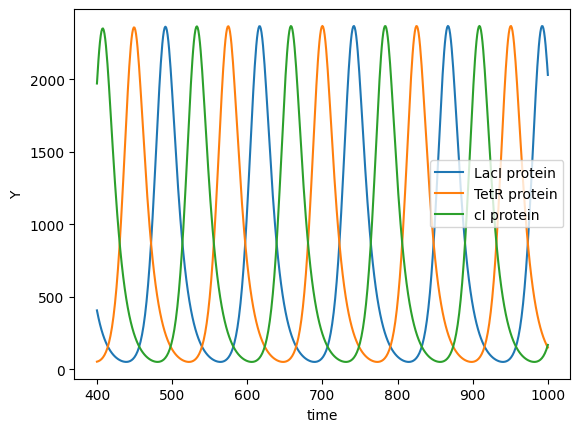

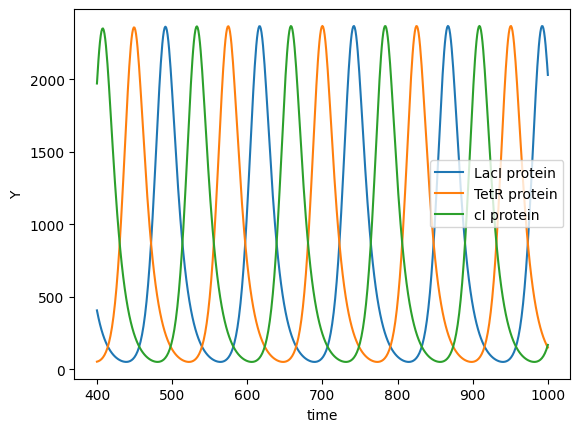

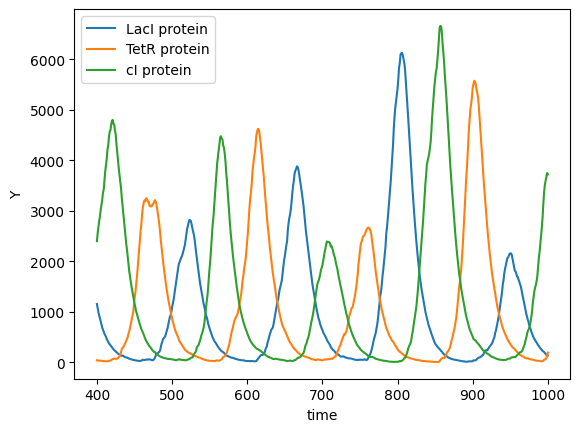

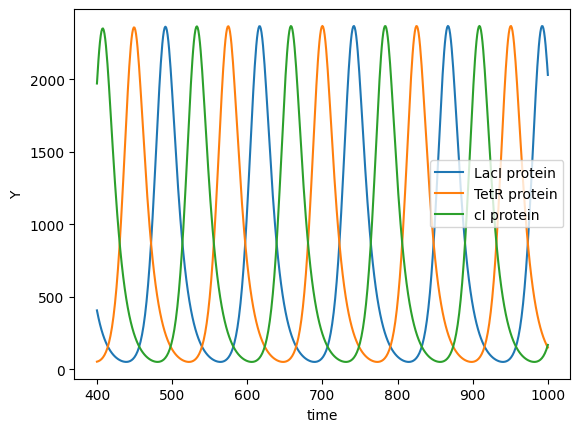

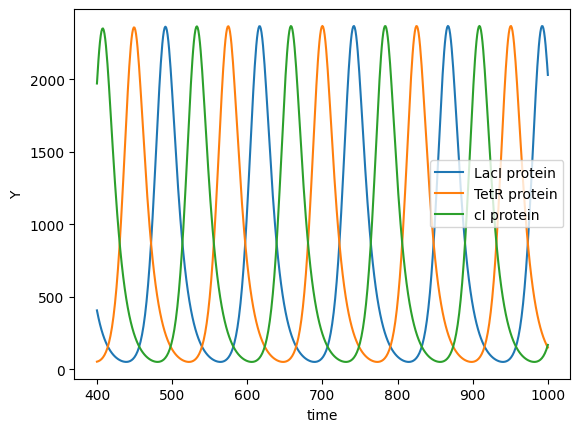

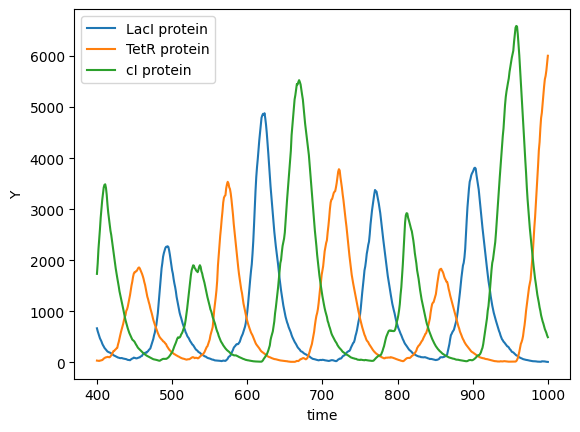

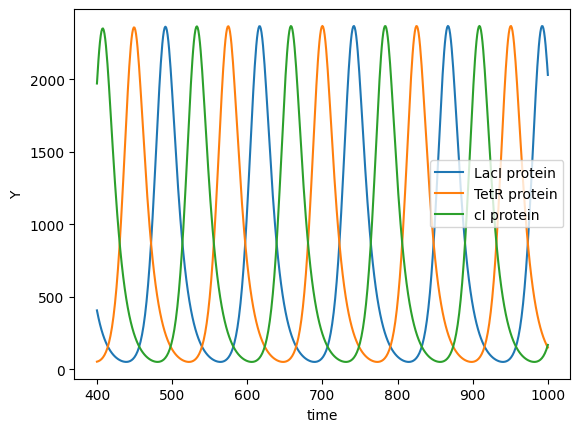

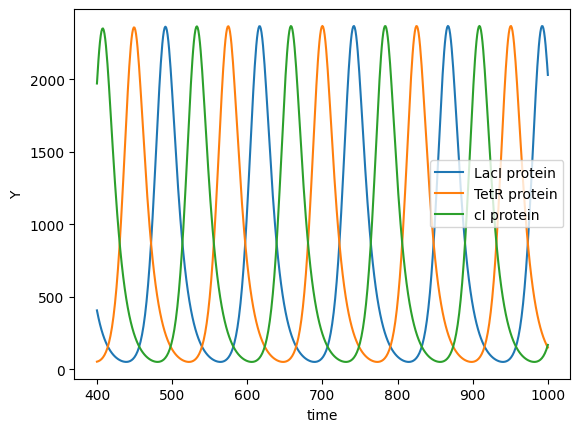

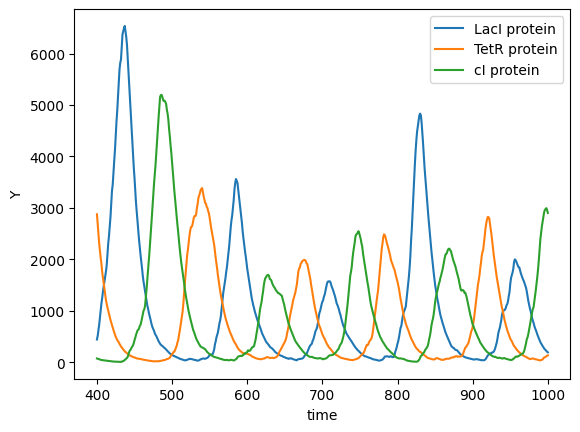

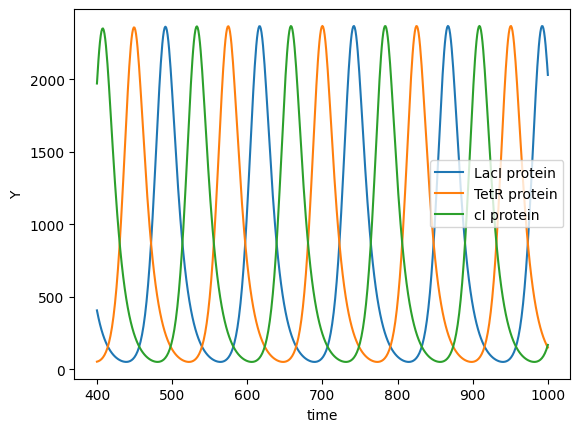

In [7]:
worker1 = Worker(job_params=job1)

In [8]:
worker1.job_result['results'].keys()

dict_keys(['cI mRNA'])

In [9]:
job2 = jobs.pop()

In [10]:
job2

{'_id': ObjectId('66aa385dd1e5f99d9dd7b8c6'),
 'status': 'PENDING',
 'job_id': 'localsbml0_2b484464-691d-48b1-8184-05abe9207d7c',
 'path': 'uploads/localsbml0_2b484464-691d-48b1-8184-05abe9207d7c/BIOMD0000000012_url.xml',
 'simulators': ['copasi', 'tellurium'],
 'comparison_id': 'localsbml0',
 'timestamp': '2024-07-31 13:13:00.724845',
 'duration': 10,
 'n_steps': 100,
 'include_outputs': True,
 'rTol': None,
 'aTol': None,
 'selection_list': ['cI mRNA']}

In [11]:
worker2 = Worker(job_params=job2)

In [12]:
worker2.job_result['results'].keys()

dict_keys(['cI mRNA'])